In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
#Map both classes found from above and assign to variables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [9]:
#Display first rows of both tables to prepare for analysis
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x25ce1faa1d0>,
 'prcp': 2.0,
 'id': 0,
 'tobs': 18.3,
 'station': 'USC00519397',
 'date': '2010-01-01'}

In [10]:
#Display first rows of both tables to prepare for analysis
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x25ce1faa6b0>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 0,
 'latitude': 21.2716,
 'elevation': 0.914}

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
most_recent_date


'2017-08-23'

<Axes: xlabel='Date', ylabel='mm'>

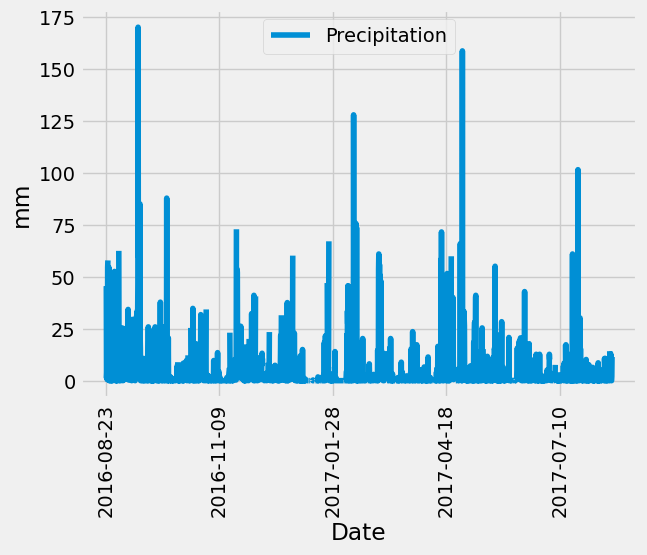

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
last_12_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
retrieve_info = session.query(Measurement.date, Measurement.prcp).filter\
    (Measurement.date >= last_12_months).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
retrieve_info_df = pd.DataFrame(retrieve_info, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
retrieve_info_df.sort_values(by=['Date'], ascending=True, inplace=True)
retrieve_info_df.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
retrieve_info_df.plot(rot=90, xlabel = 'Date', ylabel='mm')

In [25]:
# Use Pandas to calculate the summary statistics for the precipitation data
retrieve_info_df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
numb_of_stations = session.query(func.count(Station.station)).all() 
numb_of_stations

[(9,)]

In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg\
    (Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
query_active

[(12.2, 29.4, 22.03582251082252)]

Text(0.5, 4.183333333333314, 'Temperature')

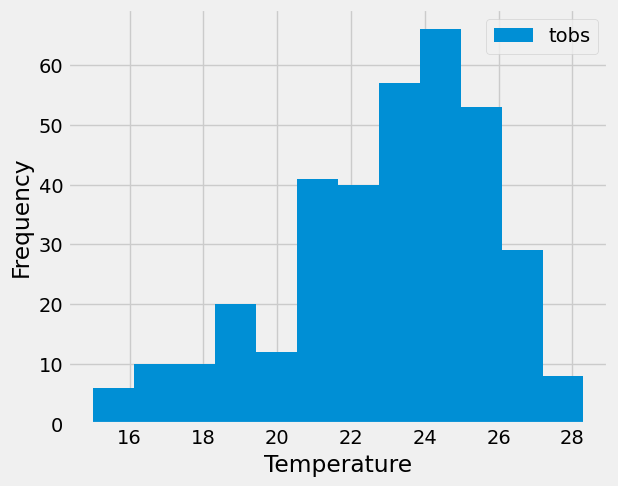

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query_results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281')\
    .filter(Measurement.date >= last_12_months).all()
plot_data = pd.DataFrame(query_results, columns=['tobs'])
plot_data.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")

# Close Session

In [32]:
# Close Session
session.close()